# EV Enerji Tüketimi EDA
Gerçek araç verilerinin ilk incelemesi ve kalitesinin anlaşılması


## 1) Kurulum ve Kütüphaneler

In [29]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Veri Yükleme

In [30]:
from pathlib import Path
import pandas as pd
DATA_PATH = Path("ev_dataset.csv")

df = pd.read_csv('ev_dataset.csv')
df.shape

(14658, 38)

##3) Genel Bakış

In [31]:
# Veri Seti Bilgileri
print("Veri Seti Bilgileri")
df.info()

Veri Seti Bilgileri
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14658 entries, 0 to 14657
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_Stamp               14658 non-null  object 
 1   latitude                 14658 non-null  float64
 2   longitude                14658 non-null  float64
 3   altitude                 14658 non-null  float64
 4   PACK_Q_SOC_INTERNAL      14658 non-null  float64
 5   PACK_Q_SOC_TRIMMED       14658 non-null  float64
 6   CELL_V_MIN_VAL           14658 non-null  float64
 7   CELL_V_MAX_VAL           14658 non-null  float64
 8   CELL_V_AVG               14658 non-null  float64
 9   PACK_V_SUM_OF_CELLS      14658 non-null  float64
 10  vehicle_speed            14658 non-null  float64
 11  Torque_Measured          14658 non-null  float64
 12  Torque_Request           14658 non-null  float64
 13  MotorTemperature         14658 non-null  float64
 14  Od

In [32]:
# Sayısal değişkenler için özet istatistikler
print("\n📊 Sayısal Değişkenlerin İstatistikleri")
display(df.describe().T)


📊 Sayısal Değişkenlerin İstatistikleri


,count,mean,std,min,25%,50%,75%,max
latitude,14658.0,39.749871,1.766312e-03,39.747075,39.748334,39.750004,39.751618,39.752448
longitude,14658.0,30.477740,2.398704e-03,30.474712,30.474912,30.477598,30.480306,30.481239
altitude,14658.0,815.318863,9.000429e+00,793.800000,806.600000,815.000000,823.500000,833.100000
PACK_Q_SOC_INTERNAL,14658.0,56.615378,1.015699e+01,34.730000,49.891500,57.460000,65.723250,72.770000
PACK_Q_SOC_TRIMMED,14658.0,55.219026,1.046189e+01,32.680000,48.291500,56.090000,64.603250,71.860000
CELL_V_MIN_VAL,14658.0,3259.896965,4.665780e+01,3007.300000,3237.110000,3271.620000,3292.800000,3340.400000
CELL_V_MAX_VAL,14658.0,3270.303775,4.502610e+01,3060.700000,3247.555000,3280.800000,3302.400000,3393.500000
CELL_V_AVG,14658.0,3266.425553,4.532801e+01,3049.100000,3244.070000,3277.400000,3298.500000,3346.500000
PACK_V_SUM_OF_CELLS,14658.0,48.997288,6.804814e-01,45.700000,48.700000,49.200000,49.500000,50.200000
vehicle_speed,14658.0,19.890413,8.274843e+00,0.000000,14.291667,16.606061,24.530080,54.909091


In [33]:
# Kategorik değişkenler için özet istatistikler
print("\n🔤 Kategorik Değişkenlerin İstatistikleri")
display(df.describe(include=['object']).T)


🔤 Kategorik Değişkenlerin İstatistikleri


,count,unique,top,freq
Time_Stamp,14658,13831,12/17/2024 10:55,60
right_indicator,14658,2,OFF,13909
left_indicator_st,14658,2,OFF,13805
brightness_st,14658,2,Night mode,14656
charging_status,14658,1,OFF,14658
charging_plug_feedback,14658,1,OFF,14658
park_brake_st,14658,2,OFF,14347
R_position_selected,14658,2,Not pressed,14650
D_position_selected,14658,2,Pressed,14529
load,14658,2,Loaded,7853


In [34]:
# Eksik Veri Sayıları
print("Eksik Veri Sayısı:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Eksik Veri Sayısı:
cabin_temperature          4665
outdoor_temperature        4665
slope                      4665
estimated_charging_time    4665
dtype: int64


**Not** : Veri setinde `cabin_temperature`, `outdoor_temperature`, `slope` ve `estimated_charging_time` sütunlarında yaklaşık %32 oranında eksik değer bulunmaktadır. Bu eksikliklerin nedeni mevsimsel farklılıktır: Yaz (Summer) döneminde bu sensörlerden ölçüm alınmamış, yalnızca Kış (Winter) döneminde kayıt yapılmıştır. Bu nedenle eksik değerler sensör hatasından değil, deney tasarımından kaynaklanmaktadır.

### 3.1 Eksik Slope Değerlerinin Hesaplanması
 **Not:** Yaz (Summer) döneminde `slope` sensöründen veri kaydedilmediği için bu sütun eksik kalmıştır.
Ancak veri setinde `latitude`, `longitude` ve `altitude` sütunları bulunduğundan, bu bilgiler kullanılarak
gerçek yol eğimi hesaplanabilir. Burada eğim şu formülle hesaplanmıştır:

\[
slope = \frac{Δh}{Δd} \times 100
\]

- Δh: İki ardışık satır arasındaki yükseklik farkı (altitude değişimi, metre)  
- Δd: İki ardışık nokta arasındaki mesafe (haversine formülü ile hesaplanan, metre)  

Bu yöntem sayesinde yaz verilerinde eksik olan slope değerleri doldurulmuş, kış verilerindeki
mevcut sensör ölçümleri ise korunmuştur.


In [35]:
# Haversine fonksiyonu (metre cinsinden)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Dünya yarıçapı (metre)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Slope hesaplama
df["delta_alt"] = df["altitude"].diff()
df["delta_dist"] = haversine(
    df["latitude"].shift(), df["longitude"].shift(),
    df["latitude"], df["longitude"]
)

# slope = Δh / Δd * 100 (%)
df["slope_calc"] = (df["delta_alt"] / df["delta_dist"]) * 100

# Sonsuz değerleri NaN yap
df["slope_calc"] = df["slope_calc"].replace([np.inf, -np.inf], np.nan)

# Eksik slope_calc'leri 0 ile doldur
df["slope_calc"] = df["slope_calc"].fillna(0)

# Eksik slope varsa hesaplanan değerle doldur
df["slope"] = df["slope"].fillna(df["slope_calc"])
df = df.dropna(subset=["delta_alt", "delta_dist"]).reset_index(drop=True)

In [36]:
# Eksik Veri Sayıları
print("Eksik Veri Sayısı:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Eksik Veri Sayısı:
cabin_temperature          4664
outdoor_temperature        4664
estimated_charging_time    4664
dtype: int64


### 3.2 Zaman Damgası Parsleme
Veri setindeki `Time_Stamp` alanı birden fazla tarih-saat formatı içerdiği için
önce robust bir pars işlemi yapıldı

In [37]:
df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], format="mixed", errors="coerce")

## 4. Hedef Değişkenin Belirlenmesi: SOC Farkı

Bu çalışmada enerji tüketimi hedef değişkeni, batarya doluluk oranındaki değişim (SoC farkı)
üzerinden tanımlanmıştır.

In [38]:
df["SoC"] = df["PACK_Q_SOC_TRIMMED"]

# Zaman farkı (saniye cinsinden)
df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")
df["delta_t"] = df["Time_Stamp"].diff().dt.total_seconds().fillna(0)

# SOC farkı (pozitif → azalma, tüketim)
df["delta_soc"] = -df["SoC"].diff().fillna(0)

# Tüketim sadece pozitif değerler olsun
df["soc_consumption"] = df["delta_soc"].clip(lower=0)

# Kümülatif SOC düşüşü
df["cum_soc_consumption"] = df["soc_consumption"].cumsum()

display(df[["Time_Stamp", "SoC", "delta_soc", "soc_consumption", "cum_soc_consumption"]].head(10))

,Time_Stamp,SoC,delta_soc,soc_consumption,cum_soc_consumption
0,2024-06-26 17:28:34,60.030,-0.000,-0.000,-0.000
1,2024-06-26 17:28:35,60.022,0.008,0.008,0.008
2,2024-06-26 17:28:36,60.020,0.002,0.002,0.010
3,2024-06-26 17:28:37,60.020,-0.000,-0.000,0.010
4,2024-06-26 17:28:38,60.016,0.004,0.004,0.014
5,2024-06-26 17:28:39,60.010,0.006,0.006,0.020
6,2024-06-26 17:28:40,60.006,0.004,0.004,0.024
7,2024-06-26 17:28:41,60.000,0.006,0.006,0.030
8,2024-06-26 17:28:42,59.990,0.010,0.010,0.040
9,2024-06-26 17:28:43,59.982,0.008,0.008,0.048


**Not:** Veri setinde batarya kapasitesi (kWh) bilgisi doğrudan bulunmamaktadır. Bu nedenle
hedef değişken olarak SOC farkı kullanılmıştır. Eğer araç batarya kapasitesi
bilinirse (örneğin 15 kWh), SOC farkı şu şekilde enerjiye dönüştürülebilir:

Enerji (Wh) = (ΔSOC / 100) × Batarya Kapasitesi (Wh)

Bu çalışma kapsamında model, doğrudan SOC tüketimi (soc_consumption) üzerinden eğitilecektir.

## 5. Özelliklerin Enerji Tüketimi ile İlişkisi

Bu bölümde enerji tüketimi ile diğer değişkenler arasındaki ilişkiler incelenmiştir.
Amaç, hangi değişkenlerin enerji tüketimini daha fazla etkilediğini anlamaktır.

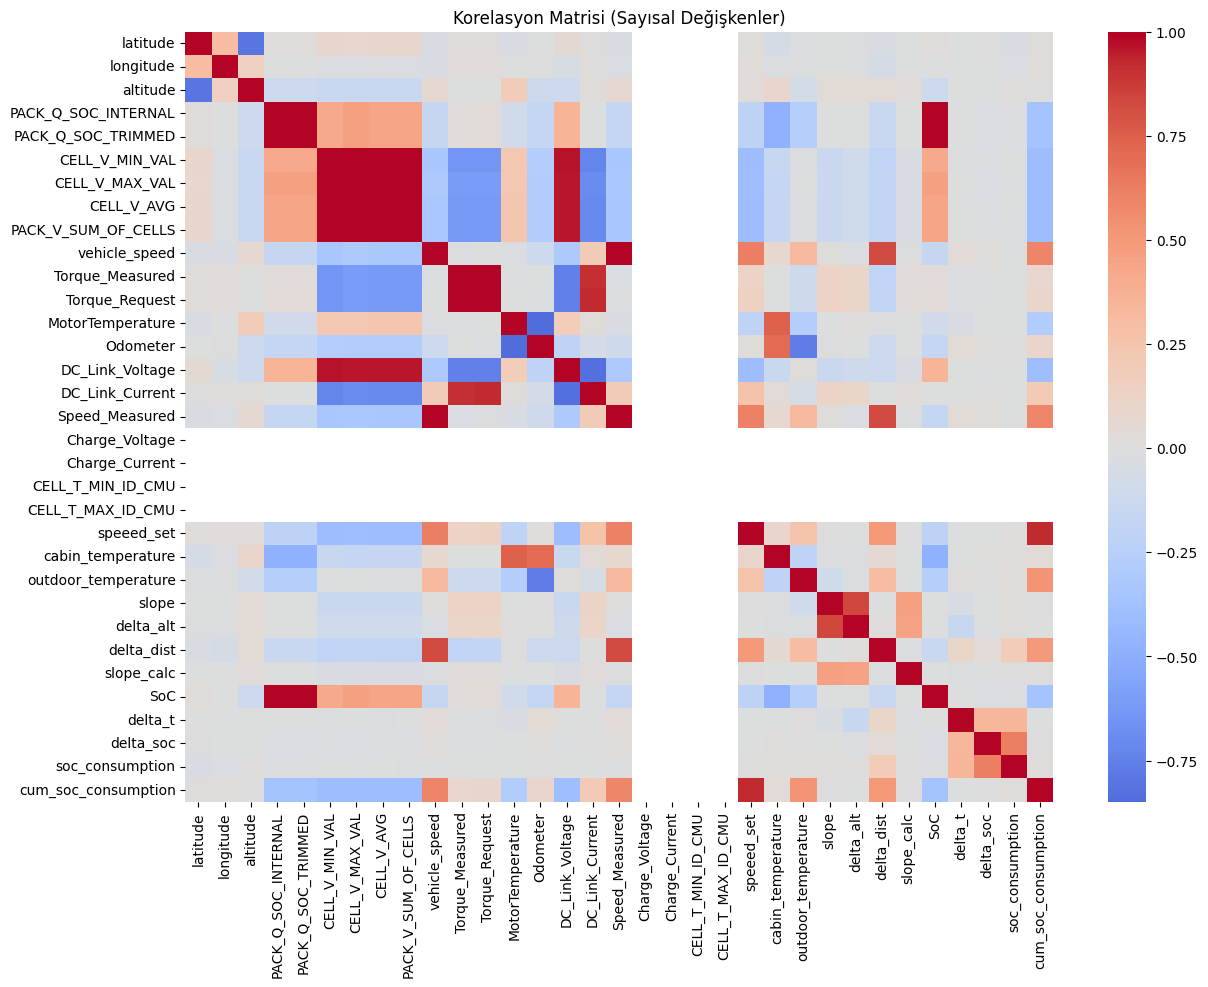

In [39]:
# 1. Korelasyon Matrisi
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Korelasyon Matrisi (Sayısal Değişkenler)")
plt.show()

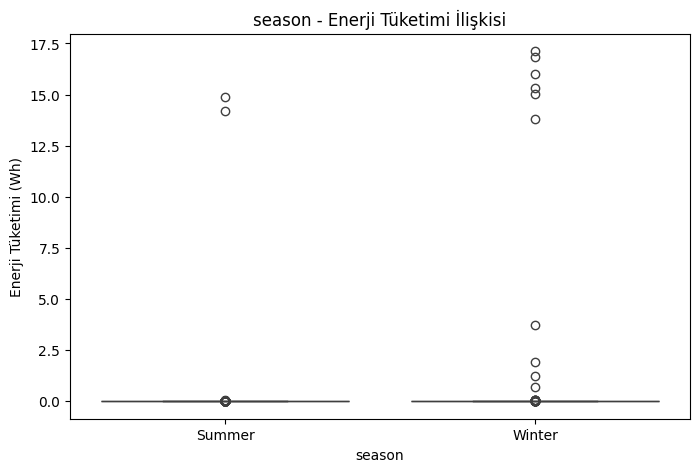

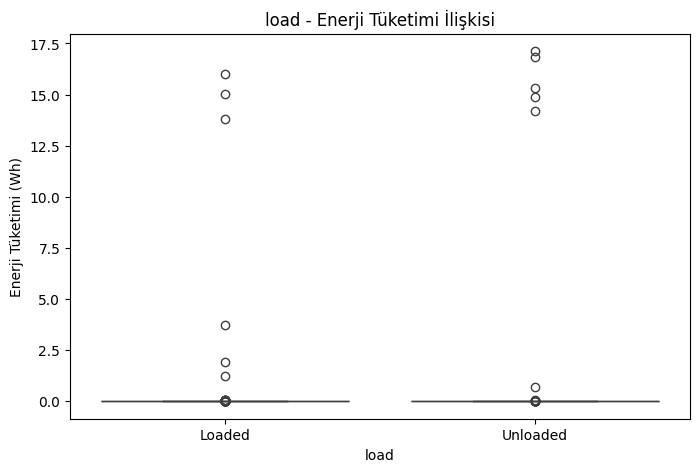

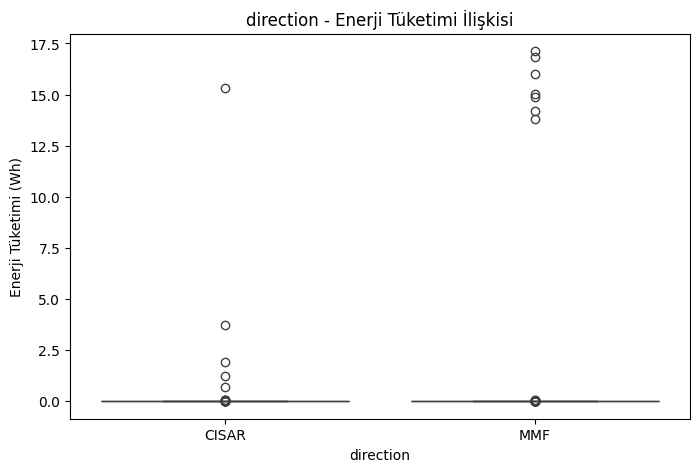

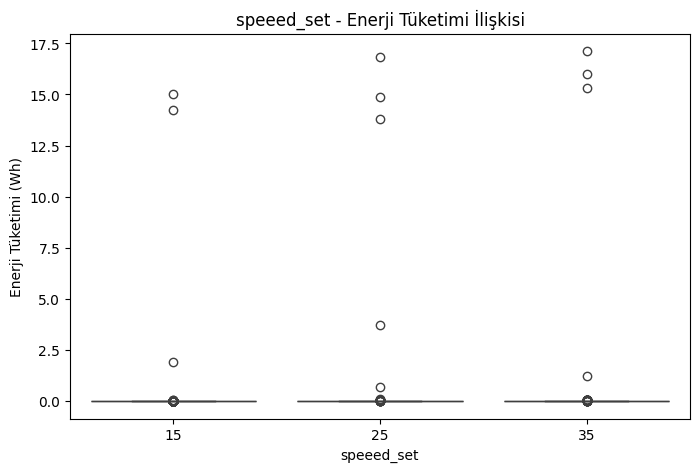

In [40]:
# 2. Kategorik değişkenlere göre enerji tüketimi
cat_cols = ["season", "load", "direction", "speeed_set"]
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col, y="soc_consumption", data=df)
    plt.title(f"{col} - Enerji Tüketimi İlişkisi")
    plt.ylabel("Enerji Tüketimi (Wh)")
    plt.show()

## 6. Özellik Seçimi
Analiz sonucunda enerji tüketimi ile anlamlı ilişkisi olan değişkenler seçilmiş,
gereksiz veya sabit kalan değişkenler veri setinden çıkarılmıştır.

In [43]:

DROP_COLS = [
    "latitude", "longitude", "Odometer","right_indicator","left_indicator_st","brightness_st","charging_status",
    "Torque_Request","direction","charge_voltage","charge_current","charging_plug_feedback","park_brake_st","R_position_selected","D_position_selected","CELL_T_MIN_ID_CMU","CELL_T_MAX_ID_CMU",
    "PACK_Q_SOC_INTERNAL", "CELL_V_MIN_VAL", "CELL_V_MAX_VAL", "PACK_V_SUM_OF_CELLS"
]

# Temiz veri seti
df_model = df.drop(columns=[c for c in DROP_COLS if c in df.columns], errors="ignore")

print("Kalan sütunlar:", df_model.columns.tolist())


Kalan sütunlar: ['Time_Stamp', 'altitude', 'PACK_Q_SOC_TRIMMED', 'CELL_V_AVG', 'vehicle_speed', 'Torque_Measured', 'MotorTemperature', 'DC_Link_Voltage', 'DC_Link_Current', 'Speed_Measured', 'Charge_Voltage', 'Charge_Current', 'speeed_set', 'load', 'season', 'cabin_temperature', 'outdoor_temperature', 'slope', 'estimated_charging_time', 'delta_alt', 'delta_dist', 'slope_calc', 'SoC', 'delta_t', 'delta_soc', 'soc_consumption', 'cum_soc_consumption']


CELL_V_MIN_VAL, CELL_V_MAX_VAL, CELL_V_AVG, PACK_V_SUM_OF_CELLS -> Birbirleriyle ve SOC değişkenleriyle güçlü korelasyona sahip. Bunlar aynı bilgi grubunu temsil ediyor (pil voltajı). Bu yüzden sadece birini bırakmak yeterli.

latitude, longitude -> Sabit ya da çok düşük korelasyona sahip.Modelde katkısı yok.

Odometer -> Sürekli artan bir değer (araç ilerledikçe hep yükseliyor).Tahmin için yanıltıcı olur.

right_indicator, left_indicator_st, brightness_st, sharging_status, charge_voltage, charge_current, charging_plug_feedback, park_brake_st, R_position_selected, D_position_selected, CELL_T_MIN_ID_CMU, CELL_T_MAX_ID_CMU -> Veri seti boyunca değişim göstermeyen değerler. 